<a href="https://colab.research.google.com/github/alra-code/Modelando-Datasets-Ricos-com-IA/blob/main/ex_06_analise_series_temporais_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os as os
from google.colab import files
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Carregar os dados
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
df.index.freq = 'MS'  # Definir a frequência como 'MS' (Início do Mês)

# Visualizar as primeiras linhas do DataFrame
print(df.head())

print("Frequência do índice:", df.index.freq)

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
Frequência do índice: <MonthBegin>


In [3]:
# Salvar o DataFrame como um arquivo CSV
df.to_csv('airline-passengers.csv', index=True)

In [4]:
# Baixar o arquivo CSV para pasta local
files.download('airline-passengers.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

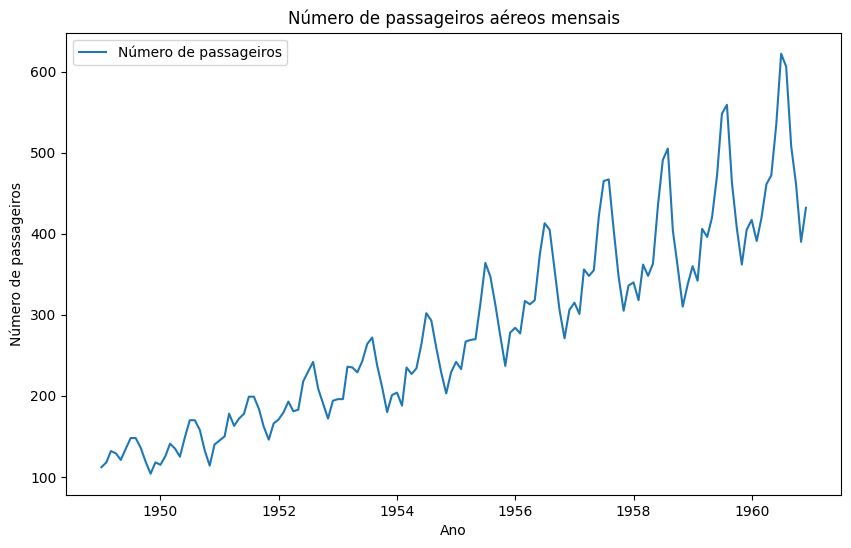

In [5]:
# Plotar a série temporal
plt.figure(figsize=(10, 6))
plt.plot(df, label='Número de passageiros')
plt.title('Número de passageiros aéreos mensais')
plt.xlabel('Ano')
plt.ylabel('Número de passageiros')
plt.legend()
plt.show()

In [6]:
# Verificar valores ausentes
print(df.isnull().sum())

Passengers    0
dtype: int64


In [7]:
# Preencher valores ausentes (se houver) com o método ffill (forward fill)
df = df.fillna(method='ffill')


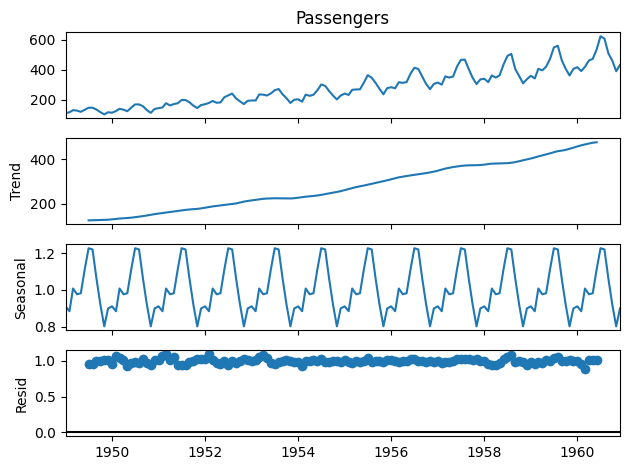

In [8]:
# Decomposição da série temporal
decomposition = seasonal_decompose(df['Passengers'], model='multiplicative')
decomposition.plot()
plt.show()

In [9]:
# Ajustar o modelo ARIMA (p=5, d=1, q=0) aos dados
model = ARIMA(df['Passengers'], order=(5, 1, 0))
model_fit = model.fit()

# Verificar o ajuste do modelo
print("Resumo do modelo ajustado:")
print(model_fit.summary())

Resumo do modelo ajustado:
                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -689.067
Date:                Sun, 14 Jul 2024   AIC                           1390.135
Time:                        14:38:49   BIC                           1407.912
Sample:                    01-01-1949   HQIC                          1397.358
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3223      0.097      3.334      0.001       0.133       0.512
ar.L2         -0.2170      0.078     -2.776      0.006      -0.370      -0.064
ar.L3         -0.0646    

In [10]:
# Fazer previsões para os próximos 12 meses
forecast = model_fit.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

forecast_index = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=12, freq='MS')
forecast_df = pd.DataFrame(forecast_mean, index=forecast_index, columns=['Forecast'])
# intervalos de confian~ca
forecast_df['Lower CI'] = forecast_conf_int.iloc[:, 0].values
forecast_df['Upper CI'] = forecast_conf_int.iloc[:, 1].values

# Verificar as previsões
print("Previsões:")
print(forecast_df.head())

Previsões:
           Forecast    Lower CI    Upper CI
1961-01-01      NaN  430.866210  548.053238
1961-02-01      NaN  416.280090  610.563454
1961-03-01      NaN  403.300178  643.776391
1961-04-01      NaN  370.268780  639.773447
1961-05-01      NaN  339.934269  622.434859


In [11]:
# Salvar o DataFrame como um arquivo CSV
df.to_csv('forecast-airliner-passengers.csv', index=True)

In [12]:
# Baixar o arquivo CSV para pasta local
files.download('forecast-airliner-passengers.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

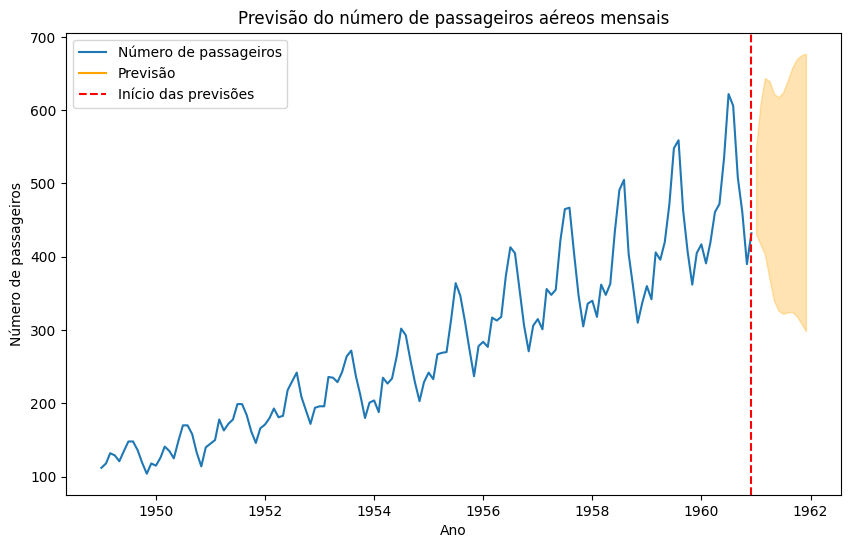

In [13]:
# Concatenar os dados de previsão com os dados originais
df_combined = pd.concat([df, forecast_df])

# Plotar as previsões junto com os dados históricos
plt.figure(figsize=(10, 6))
plt.plot(df, label='Número de passageiros')
plt.plot(forecast_df['Forecast'], label='Previsão', color='orange')
plt.fill_between(forecast_df.index, forecast_df['Lower CI'], forecast_df['Upper CI'], color='orange', alpha=0.3)
plt.axvline(x=df.index[-1], color='r', linestyle='--', label='Início das previsões')
plt.title('Previsão do número de passageiros aéreos mensais')
plt.xlabel('Ano')
plt.ylabel('Número de passageiros')
plt.legend()
plt.show()